In [1]:
#from src.utils.color_filter import ColorFilter
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import re
import os

In [20]:
from typing import Any, Tuple, List
import cv2
import numpy as np

class ColorFilter:
    def __init__(
                self, 
                ) -> None:
        """Color filter to exclude images containing no or not enough tissue

        Parameters
        ----------
        threshold: float
            Ratio of pixels that correspond to tissue in image
        data_out_type: ImageFormats
            Enum defining final data type of filtered images for storage
        """
        self.counter_img_keep = 0
        self.counter_img_disregard = 0
    
    def _read_img(self, dir: str) -> np.array:
        return cv2.imread(dir)

    def _convert_BGR_to_HSV(self, img: np.array) -> np.array:
        return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    def _get_mask(self, img_hsv: np.array) -> np.array:
        return cv2.inRange(img_hsv, LOWER_HSV_RANGE, UPPER_HSV_RANGE)

    def _get_filtered_img(self, img: np.array, mask: np.array) -> np.array:
        return cv2.bitwise_and(img, img, mask=mask)
    
    def _filter(self, img: np.array) -> np.array:
        """Filter pipeline:
        1. Convert to HSV space
        2. Retrieve image mask
        3. Retrieve filtered image
        
        Parameters
        ----------
        img: np.array
            Input image
        
        Returns
        -------
        np.array
            Filtered image
        """
        hsv_img = self._convert_BGR_to_HSV(img)
        mask = self._get_mask(hsv_img)
        return self._get_filtered_img(img, mask)
    
    def _get_sample_ratio(self, img_arr: np.array) -> float:
        """Retrieves the ratio of the image containing sample
        
        Parameters
        ----------
        img_arr: np.array
            Input image
        
        Returns
        -------
        float
            Ratio of the image containing sample
        """
        hsv_img = self._convert_BGR_to_HSV(img_arr)
        mask = self._get_mask(hsv_img)
        sample_pixel_count = (mask/255).astype(int).sum()
        return (sample_pixel_count/mask.size)*100, mask

In [4]:
def _select_patches(self, patch_size = [256, 256], patch_num: int = 10, threshold: float = 0.2) -> None:
    # select random patches from each image
    patches = []
    patch_labels = []
    for img in self.array_images:
        image = io.imread(img)
        h, w, _ = image.shape
        for _ in range(patch_num):
            x = np.random.randint(int(patch_size[0]/2), h - patch_size[0])
            y = np.random.randint(int(patch_size[1]/2), w - patch_size[1])
            a = image[x:x + image.shape[0], y:y + image.shape[1]]
            b = self.color_filter._get_sample_ratio(a)
            patch = image[x-int(patch_size[0]/2):x+int(patch_size[0]/2), y-int(patch_size[1]/2):y+int(patch_size[1]/2)]
            if self.color_filter._get_sample_ratio(patch) >= threshold:
                patches.append((img, x, y))
                patch_labels.append(int(re.findall(r"-?\d+", img)[-1]))

In [58]:
# upper and lower purple ranges in HSV color space
LOWER_HSV_RANGE = np.array([130,20,20])
UPPER_HSV_RANGE = np.array([180,255,255])

In [71]:
path = "/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_1_2/sample_71"
img = "distance-200.jpg"
img_dir = os.path.join(path, img)
color_filter = ColorFilter()

In [72]:
img = io.imread(img_dir)
ratio, mask = color_filter._get_sample_ratio(img)
print(ratio)

11.87326388888889


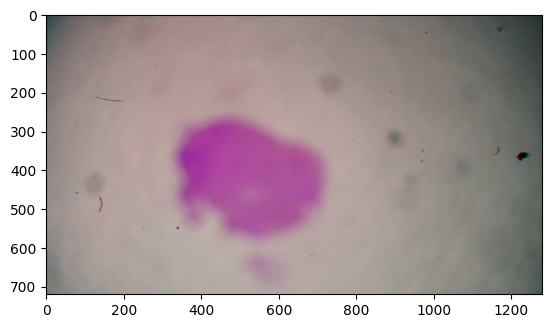

In [73]:
plt.imshow(img)
plt.show()

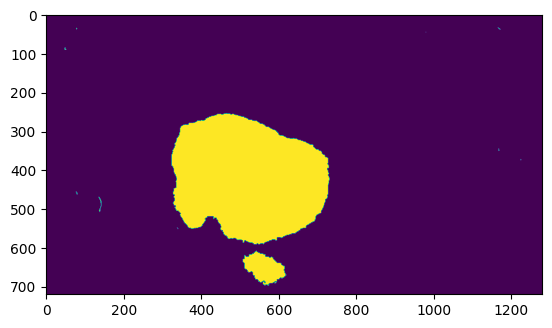

In [74]:
plt.imshow(mask)
plt.show()